In [6]:
import pandas as pd
import requests

# Define the URL for data download
url = "https://data.nasa.gov/resource/y77d-th95.json"
# Send a GET request to download the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the JSON data
    data = response.json()

    # Create a DataFrame from the data
    df = pd.DataFrame(data)
        # Convert the DataFrame to CSV format and save it
    df.to_csv('nasa_data.csv', index=False)
    print("Data has been converted and saved to 'nasa_data.csv'")
else:
    print("Failed to download the data. Check the URL or try again later.")

Data has been converted and saved to 'nasa_data.csv'


In [18]:
df = pd.read_csv("nasa_data.csv")

In [23]:
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("nasa_data.csv")

# Filter out rows with invalid dates (NaT)
df = df[df['year'].notnull()]



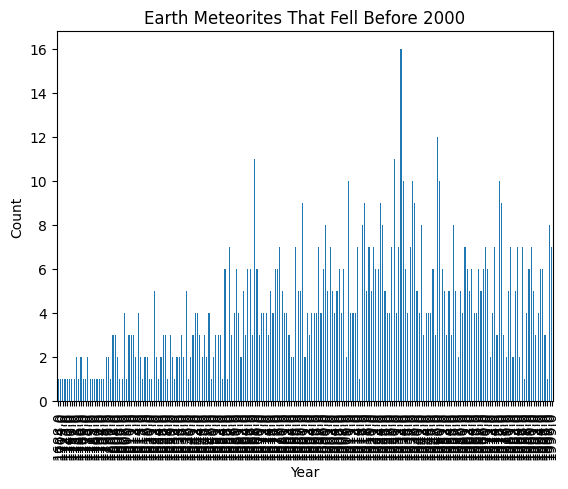

In [20]:
# Convert the "year" column to datetime
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'].dt.year < 2000]

# Plot the count of Earth meteorites that fell before 2000 by year
earth_meteorites_before_2000.groupby(df['year'].dt.year)['name'].count().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Earth Meteorites That Fell Before 2000")
plt.show()

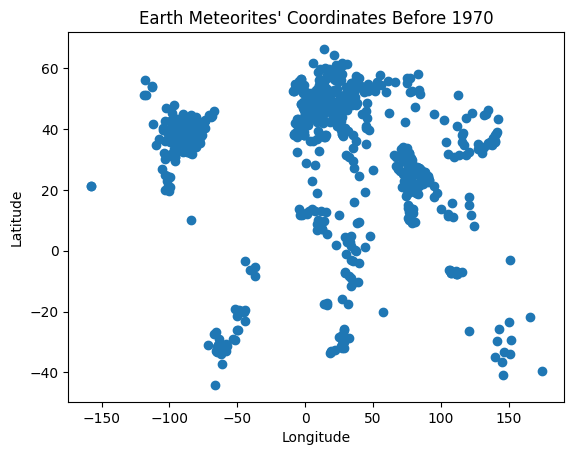

In [21]:
# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_coords_before_1970 = df[df['reclat'].notnull() & (df['year'].dt.year < 1970)]

# Plot the scatter plot of Earth meteorites' coordinates before 1970
plt.scatter(earth_meteorites_coords_before_1970['reclong'], earth_meteorites_coords_before_1970['reclat'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earth Meteorites' Coordinates Before 1970")
plt.show()


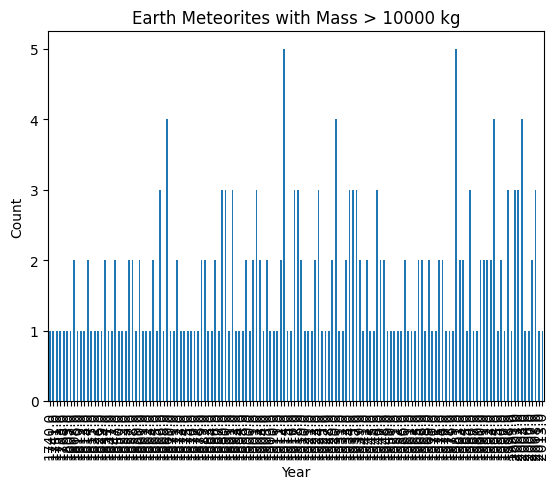

In [22]:

# Get all the Earth meteorites with a mass greater than 10000 kg
earth_meteorites_mass_gt_10000 = df[df['mass'] > 10000]

# Plot the count of Earth meteorites with a mass greater than 10000 kg by year
earth_meteorites_mass_gt_10000.groupby(df['year'].dt.year)['name'].count().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Earth Meteorites with Mass > 10000 kg")
plt.show()
